In [1]:
import numpy as np
from anemoi import MiniZephyr
from windtunnel import HelmBaseProblem, HelmBaseSurvey, HelmFields

In [2]:
sz = np.arange(25, 176, 1)
sx = 25. * np.ones((len(sz),))
rz = np.arange(25, 176, 1)
rx = 75. * np.ones((len(rz),))

geom = {
    'src':      np.vstack([sx, sz]).T,
    'rec':      np.vstack([rx, rz]).T,
}

systemConfig = {
    'dx':       1.,                     # m
    'dz':       1.,                     # m
    'c':        2500.,                  # m/s
    'rho':      1.,                     # kg/m^3
    'nx':       100,                    # count
    'nz':       200,                    # count
    'freqs':    np.arange(50, 450, 50), # Hz
    'disc':     MiniZephyr,             # discretization
    'geom':     geom,                   # dictionary
}

In [3]:
problem = HelmBaseProblem(systemConfig)
survey  = HelmBaseSurvey(systemConfig)
problem.pair(survey)

In [4]:
dPred = survey.dpred(None).reshape((survey.nrec, survey.nsrc, survey.nfreq))

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


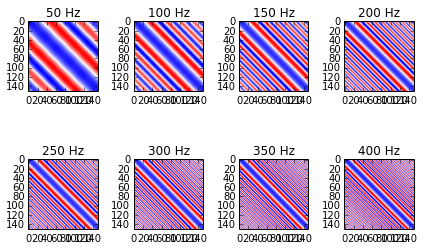

In [6]:
fig = figure()

plotOpts = {
    'cmap': cm.bwr,
}

for ifreq in xrange(8):
    freq = systemConfig['freqs'][ifreq]
    subplot(2, 4, ifreq+1)
    imshow(dPred[:,:,ifreq].real, **plotOpts)
    title('%d Hz'%(freq,))

fig.tight_layout()